<a href="https://colab.research.google.com/github/AhmedAbdoulahi/DataScience/blob/master/spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Chargement des donnees

In [ ]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

#### Nous allons tous d'abord traiter les donnees d'entrainement et plus tard les donnees tests

In [ ]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
print(train['Transported'].value_counts())

Transported
True     4378
False    4315
Name: count, dtype: int64


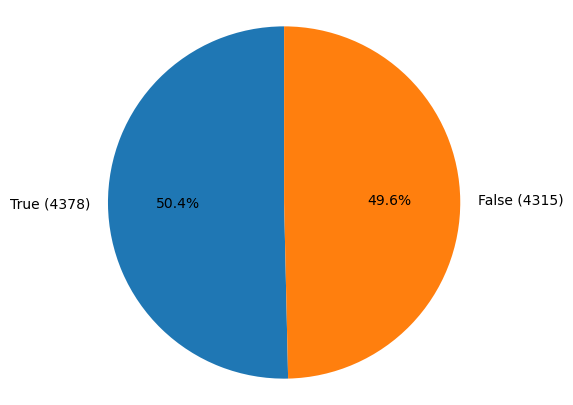

In [ ]:
# creer plot
fig = plt.figure(figsize=(5, 5))
counts = train['Transported'].value_counts()
labels = [f"True ({counts[True]})", f"False ({counts[False]})"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# visualiser plot
plt.axis('equal')
plt.show()

## Traitement des valeurs manquantes NaN

In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
print(f'Avant suppression nan : {train.shape[0]}')
print(f'Apres suppression nan : {train.dropna().shape[0]}')

Avant suppression nan : 8693
Apres suppression nan : 6606


Avant de supprimer les valeurs manquantes, l'ensemble de données (train) contient 8693 lignes.
Après la suppression des valeurs manquantes, il reste 6606 lignes.
Cette étape montre que supprimer toutes les lignes contenant au moins une valeur manquante réduirait l'ensemble de données à 6606 lignes, ce qui signifie perdre environ 2087 lignes. La décision est prise de ne pas supprimer toutes les valeurs manquantes pour ne pas perdre une grande quantité de données.

In [ ]:

# suppression des colonne pas necessaire pour l'enrainement
tmp_train=train.drop(columns=['PassengerId', 'Cabin', 'Name'])

#one hot coding
tmp_train=pd.get_dummies(tmp_train,columns=['HomePlanet','Destination'])


Encodage one-hot :
L'encodage one-hot est appliqué aux colonnes HomePlanet et Destination pour transformer les catégories en variables numériques binaires, ce qui est nécessaire pour l'entraînement de la plupart des modèles d'apprentissage automatique.

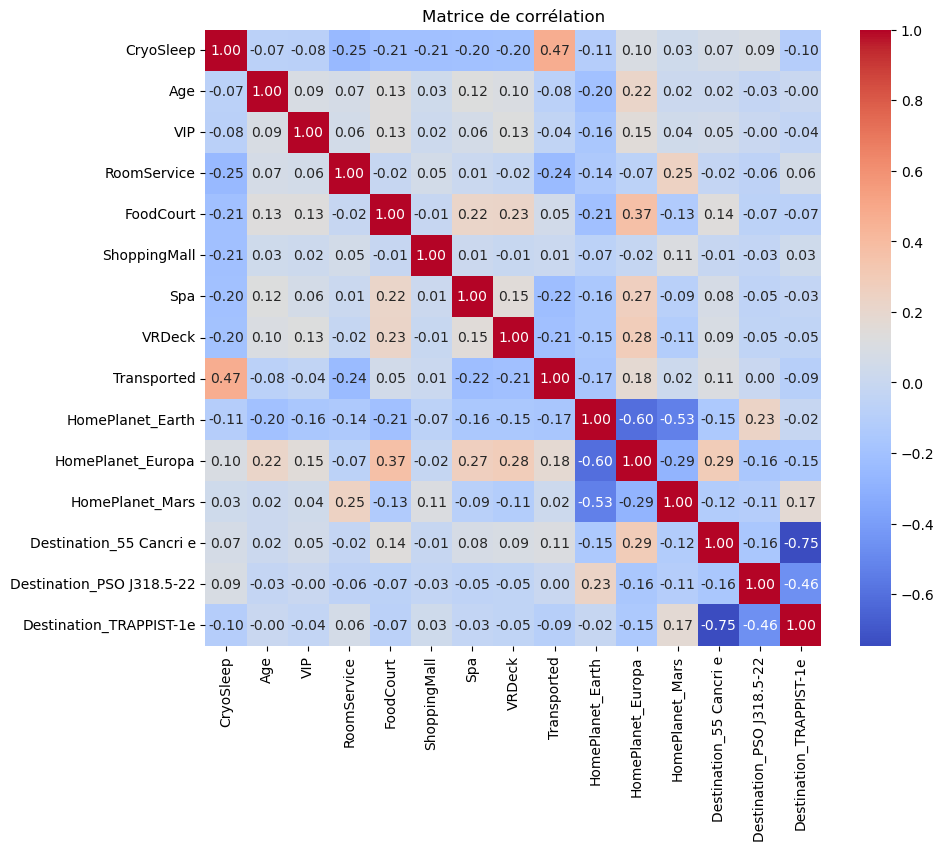

In [ ]:
# Calcul de la table de corrélation
corr = tmp_train.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))  # Taille ajustable selon les besoins
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Ajout de titres pour la lisibilité
plt.title('Matrice de corrélation')
plt.show()

La corrélation entre les différentes variables est calculée pour aider à identifier les relations significatives qui pourraient influencer les décisions concernant le traitement des valeurs manquantes

Pour chaque colonne ayant des valeurs manquantes, une décision est prise sur la manière de gérer ces valeurs manquantes, en fonction du nombre de valeurs manquantes et de la corrélation de la colonne avec d'autres variables. ci_dessous

**HomePlanet** 201 remplacer par **unoknown** parce qu'on connait pas lequel des Planete donc logique

**CryoSleep** 217 nan supprimer ceci pourraient influencer notre resultat vu une forte correlation de 0.41

**Cabin** 199 nan supprimer

**Destination** 182 ajouter **unknown** car destination inconnue

**Age** 179 avg ici on remplace par la moyenne ce qui est tout a fais logique car donnees continues

**VIP** 203, étant donné la distribution déséquilibrée des valeurs (la majorité étant False), remplacer les valeurs manquantes par False semble être une décision logique.

**RoomService** 181 median=0 (la majorité étant 0)

**FoodCourt** 183 median=0 (la majorité étant 0)

**ShoppingMall** 208 median=0 (la majorité étant 0)

**Spa** 183 median=0 (la majorité étant 0)

**VRDeck** 188 median=0 (la majorité étant 0)

**Name** 200 remove column

In [ ]:
train['HomePlanet'].fillna('Unknown', inplace=True)
train=train.dropna(subset=['CryoSleep'])
train=train.dropna(subset=['Cabin'])
train['Destination'].fillna('Unknown', inplace=True)
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['VIP'].fillna(False, inplace=True)
train['RoomService'].fillna(0, inplace=True)
train['FoodCourt'].fillna(0, inplace=True)
train['ShoppingMall'].fillna(0, inplace=True)
train['Spa'].fillna(0, inplace=True)
train['VRDeck'].fillna(0, inplace=True)
train=train.drop(columns=['Name'])

# meme chose pour le test afin d'eviter des incoherences ou de refaire plus tard
test['HomePlanet'].fillna('Unknown', inplace=True)
test['Destination'].fillna('Unknown', inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['VIP'].fillna(False, inplace=True)
test['RoomService'].fillna(0, inplace=True)
test['FoodCourt'].fillna(0, inplace=True)
test['ShoppingMall'].fillna(0, inplace=True)
test['Spa'].fillna(0, inplace=True)
test['VRDeck'].fillna(0, inplace=True)
test=test.drop(columns=['Name'])

Voila le resultat

In [ ]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [ ]:
# supprimons les col non importantes mais pour cabin nous verrons comment l'exploiter
tmp_train=train.drop(columns=['PassengerId', 'Cabin'])

# one hot coding
tmp_train=pd.get_dummies(tmp_train,columns=['HomePlanet','Destination'])

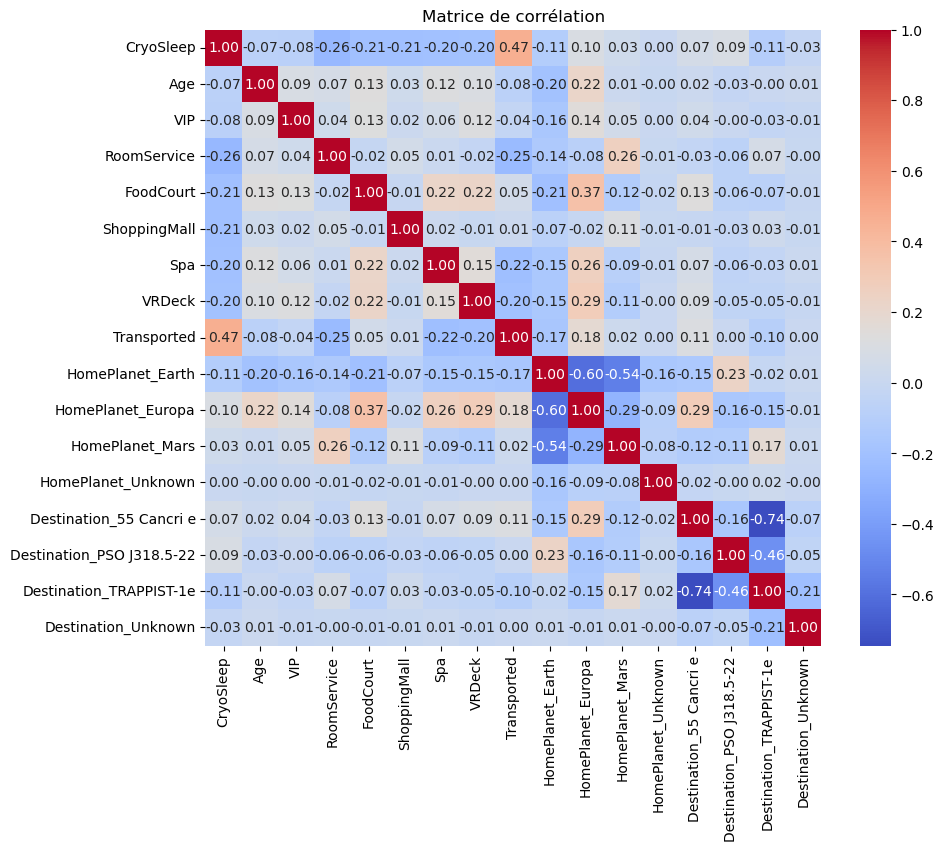

In [ ]:
# Calcul de la table de corrélation
corr = tmp_train.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))  # Taille ajustable selon les besoins
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Ajout de titres pour la lisibilité
plt.title('Matrice de corrélation')
plt.show()

### Extraction des caractéristiques à partir de la colonne Cabin :

La colonne Cabin contient des informations composées, probablement sous une forme similaire à "Deck/Num/Side", où

**Deck** désigne le pont sur lequel se trouve la cabine,
        
**Num** est le numéro de la cabine,

**Side** indique le côté de la cabine (par exemple, gauche ou droit, ou avant/arrière sur le navire).
        
L'objectif est de séparer ces informations composées en colonnes distinctes pour une meilleure analyse et utilisation dans des modèles ML.

In [ ]:
# Convertir Cabine en 3 cols (Deck, Num, Side)
train[['Deck', 'Num','Side']] = train.Cabin.str.split("/", expand = True)
test[['Deck', 'Num','Side']] = test.Cabin.str.split("/", expand = True)

# supprimer les anciens colonnes
train=train.drop(columns=['Cabin'])
test=test.drop(columns=['Cabin'])

### Encodage : One hot encoding

L'encodage one-hot est une technique utilisée pour convertir des variables catégorielles en une forme qui peut être fournie aux algorithmes de machine learning

In [ ]:
#regarons les types des donnees
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8284 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8284 non-null   object 
 1   HomePlanet    8284 non-null   object 
 2   CryoSleep     8284 non-null   object 
 3   Destination   8284 non-null   object 
 4   Age           8284 non-null   float64
 5   VIP           8284 non-null   bool   
 6   RoomService   8284 non-null   float64
 7   FoodCourt     8284 non-null   float64
 8   ShoppingMall  8284 non-null   float64
 9   Spa           8284 non-null   float64
 10  VRDeck        8284 non-null   float64
 11  Transported   8284 non-null   bool   
 12  Deck          8284 non-null   object 
 13  Num           8284 non-null   object 
 14  Side          8284 non-null   object 
dtypes: bool(2), float64(6), object(7)
memory usage: 922.2+ KB


ces col sont categorielles :

PassengerId  
HomePlanet    
CryoSleep     
Cabin         
Destination   
Deck          
Num          
Side          

#### Traitement de la colonne Side

In [ ]:
# Pour la colonne Side, qui indique le côté de la cabine (P pour un côté, S pour l'autre), une nouvelle colonne booléenne Side_P est créée. Cette colonne vaut True si Side est égal à P, et False si Side est égal à S
train['Side_P']=train['Side']=='P'
# on supprime l'ancien col Side
train=train.drop(columns=['Side'])

# meme chose pour test
test['Side_P'] = np.where(test['Side'] == 'P', True, np.where(test['Side'] == 'S', False, np.nan))
test=test.drop(columns=['Side'])

#### Encodage one-hot pour la colonne Deck

In [ ]:
# La colonne Deck, qui contient 8 catégories différentes, est transformée en utilisant l'encodage one-hot. Cela crée une nouvelle colonne pour chaque catégorie de Deck, avec des valeurs booléennes indiquant la présence ou l'absence de chaque catégorie.
train=pd.get_dummies(train,columns=['Deck'])
test=pd.get_dummies(test,columns=['Deck'])

#### Transformation de la colonne Num en entier

In [ ]:
# La colonne Num, qui représente le numéro de la cabine, est convertie en entier. Cela est nécessaire pour assurer que les modèles d'apprentissage ML traitent cette information comme numérique et non comme textuelle.
#Pour l'ensemble train, la conversion est directe.
train=train.astype({'Num':'int'})
# test aussi mais Pour l'ensemble test, pd.to_numeric est utilisée avec l'argument errors='coerce' pour convertir les valeurs non numériques en NaN (et ensuite en entier avec astype('Int64')), ce qui permet de gérer proprement les valeurs non numériques ou manquantes.
test['Num'] = pd.to_numeric(test['Num'], errors='coerce').astype('Int64')

#### Encodage one-hot pour les colonnes HomePlanet et Destination

In [ ]:
# Comme pour Deck, cela crée des colonnes supplémentaires pour chaque catégorie unique dans ces colonnes, facilitant le traitement par des algorithmes ML
train=pd.get_dummies(train,columns=['HomePlanet','Destination'])
test=pd.get_dummies(test,columns=['HomePlanet','Destination'])

#### Conversion de la colonne CryoSleep en booléen :

La colonne CryoSleep est convertie en type booléen pour l'ensemble train directement avec astype({'CryoSleep':'bool'}).

Pour l'ensemble test, la conversion est réalisée avec .astype(pd.BooleanDtype()), ce qui permet également de gérer les valeurs manquantes en conservant une représentation spécifique de type booléen qui peut inclure NaN.

In [ ]:
train=train.astype({'CryoSleep':'bool'})
# test
test['CryoSleep'] = test['CryoSleep'].astype(pd.BooleanDtype())

In [ ]:
# verification
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8284 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8284 non-null   object 
 1   CryoSleep                  8284 non-null   bool   
 2   Age                        8284 non-null   float64
 3   VIP                        8284 non-null   bool   
 4   RoomService                8284 non-null   float64
 5   FoodCourt                  8284 non-null   float64
 6   ShoppingMall               8284 non-null   float64
 7   Spa                        8284 non-null   float64
 8   VRDeck                     8284 non-null   float64
 9   Transported                8284 non-null   bool   
 10  Num                        8284 non-null   int64  
 11  Side_P                     8284 non-null   bool   
 12  Deck_A                     8284 non-null   bool   
 13  Deck_B                     8284 non-null   bool   
 1

Vu le type des nvelles et anciennes cols, le traitement s'est bien passer

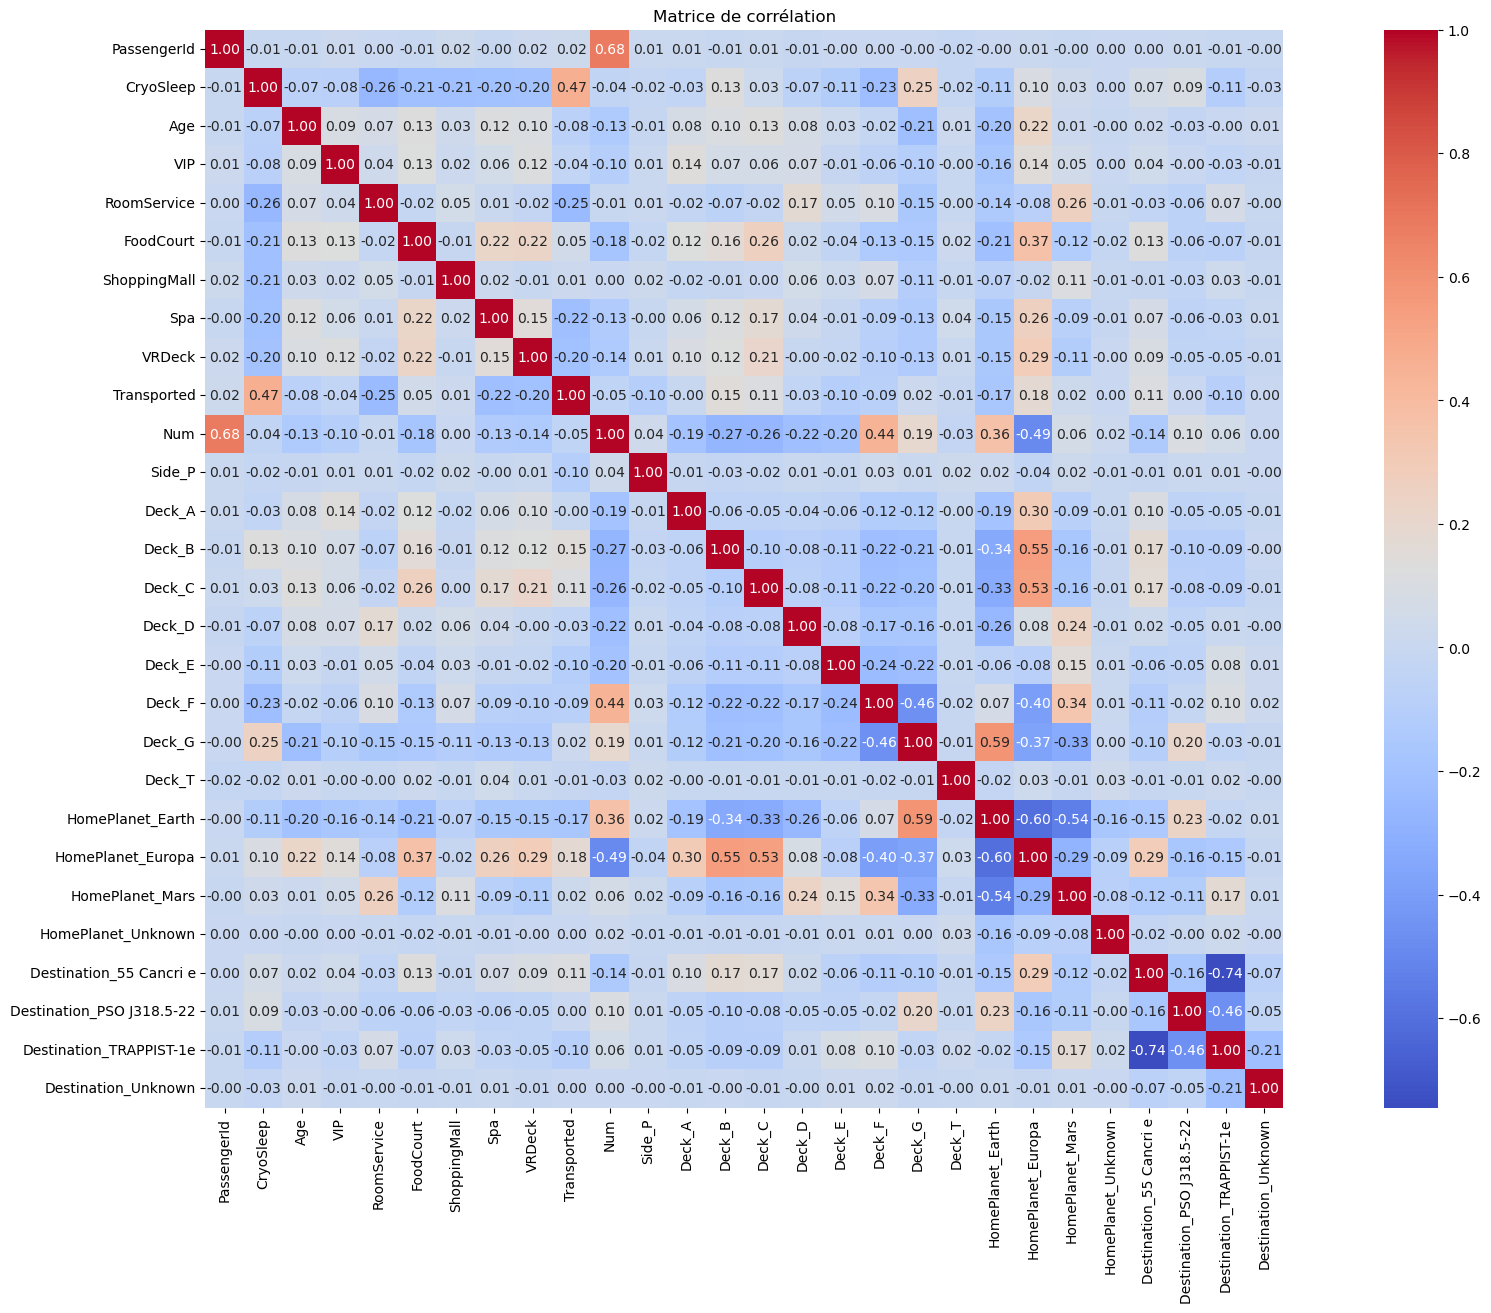

In [ ]:
# Calcul de la table de corrélation
corr = train.corr()

# Création de la heatmap
plt.figure(figsize=(26, 14))  # Taille ajustable selon les besoins
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Ajout de titres pour la lisibilité
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
corr

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_G,Deck_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
PassengerId,1.000000,-0.005650,-0.006330,0.012287,0.002495,-0.008222,0.019433,-0.003103,0.015413,0.022289,...,-0.000043,-0.018873,-0.001248,0.005245,-0.004931,0.002363,0.001467,0.007905,-0.005456,-0.002305
CryoSleep,-0.005650,1.000000,-0.073049,-0.078675,-0.255956,-0.207876,-0.210218,-0.201112,-0.195844,0.467484,...,0.252820,-0.016358,-0.111814,0.096623,0.034326,0.003678,0.065120,0.092115,-0.105226,-0.026960
Age,-0.006330,-0.073049,1.000000,0.092853,0.070046,0.129510,0.032735,0.119642,0.100972,-0.075825,...,-0.214481,0.012514,-0.198702,0.219211,0.013670,-0.002344,0.016026,-0.026886,-0.001624,0.014123
VIP,0.012287,-0.078675,0.092853,1.000000,0.036186,0.125637,0.017253,0.057207,0.117695,-0.035127,...,-0.100613,-0.003368,-0.162954,0.144452,0.047009,0.003065,0.039571,-0.001141,-0.030155,-0.011292
RoomService,0.002495,-0.255956,0.070046,0.036186,1.000000,-0.016441,0.053597,0.010286,-0.023127,-0.246065,...,-0.152087,-0.003951,-0.140558,-0.078715,0.260390,-0.005408,-0.029741,-0.064322,0.066741,-0.003590
FoodCourt,-0.008222,-0.207876,0.129510,0.125637,-0.016441,1.000000,-0.012198,0.217162,0.223465,0.046758,...,-0.151763,0.015501,-0.208147,0.365734,-0.124057,-0.020503,0.133918,-0.064488,-0.073383,-0.009491
ShoppingMall,0.019433,-0.210218,0.032735,0.017253,0.053597,-0.012198,1.000000,0.017675,-0.006914,0.012925,...,-0.110036,-0.006190,-0.071188,-0.015041,0.107383,-0.008016,-0.010966,-0.030945,0.030342,-0.005403
Spa,-0.003103,-0.201112,0.119642,0.057207,0.010286,0.217162,0.017675,1.000000,0.151816,-0.216969,...,-0.125846,0.043495,-0.153221,0.263650,-0.086666,-0.011653,0.072875,-0.055267,-0.031847,0.009104
VRDeck,0.015413,-0.195844,0.100972,0.117695,-0.023127,0.223465,-0.006914,0.151816,1.000000,-0.204975,...,-0.131034,0.008949,-0.154064,0.285303,-0.112748,-0.000890,0.089384,-0.046681,-0.045793,-0.009363
Transported,0.022289,0.467484,-0.075825,-0.035127,-0.246065,0.046758,0.012925,-0.216969,-0.204975,1.000000,...,0.017763,-0.011170,-0.168624,0.175768,0.021372,0.001133,0.108337,0.004507,-0.097225,0.001313


In [ ]:
test

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,...,Deck_G,Deck_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0013_01,True,27.000000,False,0.0,0.0,0.0,0.0,0.0,3,...,True,False,True,False,False,False,False,False,True,False
1,0018_01,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0,4,...,False,False,True,False,False,False,False,False,True,False
2,0019_01,True,31.000000,False,0.0,0.0,0.0,0.0,0.0,0,...,False,False,False,True,False,False,True,False,False,False
3,0021_01,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0,1,...,False,False,False,True,False,False,False,False,True,False
4,0023_01,False,20.000000,False,10.0,0.0,635.0,0.0,0.0,5,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.000000,False,0.0,0.0,0.0,0.0,0.0,1496,...,True,False,True,False,False,False,False,False,True,False
4273,9269_01,False,42.000000,False,0.0,847.0,17.0,10.0,144.0,<NA>,...,False,False,True,False,False,False,False,False,True,False
4274,9271_01,True,28.658146,False,0.0,0.0,0.0,0.0,0.0,296,...,False,False,False,False,True,False,True,False,False,False
4275,9273_01,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0,297,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8284 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8284 non-null   object 
 1   CryoSleep                  8284 non-null   bool   
 2   Age                        8284 non-null   float64
 3   VIP                        8284 non-null   bool   
 4   RoomService                8284 non-null   float64
 5   FoodCourt                  8284 non-null   float64
 6   ShoppingMall               8284 non-null   float64
 7   Spa                        8284 non-null   float64
 8   VRDeck                     8284 non-null   float64
 9   Transported                8284 non-null   bool   
 10  Num                        8284 non-null   int64  
 11  Side_P                     8284 non-null   bool   
 12  Deck_A                     8284 non-null   bool   
 13  Deck_B                     8284 non-null   bool   
 1

Id est sans importance mais IdType apporte une information suplementaire ce qui pourrait ameliorer le model

In [ ]:
test

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,...,Deck_G,Deck_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0013_01,True,27.000000,False,0.0,0.0,0.0,0.0,0.0,3,...,True,False,True,False,False,False,False,False,True,False
1,0018_01,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0,4,...,False,False,True,False,False,False,False,False,True,False
2,0019_01,True,31.000000,False,0.0,0.0,0.0,0.0,0.0,0,...,False,False,False,True,False,False,True,False,False,False
3,0021_01,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0,1,...,False,False,False,True,False,False,False,False,True,False
4,0023_01,False,20.000000,False,10.0,0.0,635.0,0.0,0.0,5,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.000000,False,0.0,0.0,0.0,0.0,0.0,1496,...,True,False,True,False,False,False,False,False,True,False
4273,9269_01,False,42.000000,False,0.0,847.0,17.0,10.0,144.0,<NA>,...,False,False,True,False,False,False,False,False,True,False
4274,9271_01,True,28.658146,False,0.0,0.0,0.0,0.0,0.0,296,...,False,False,False,False,True,False,True,False,False,False
4275,9273_01,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0,297,...,False,False,False,True,False,False,False,False,False,True


### Traitement des données manquantes pour l'ensemble de test:

Pour gérer les données manquantes dans l'ensemble de données de test, nous avons utilisez KNNImputer de sklearn.impute, une méthode d'imputation qui remplit les valeurs manquantes en utilisant l'imputation K-Nearest Neighbors. Chaque valeur manquante est imputée en utilisant les valeurs non manquantes des k voisins les plus proches trouvés dans l'ensemble de données, où k est le nombre de voisins spécifié par n_neighbors.

In [ ]:
from sklearn.impute import KNNImputer

# une instance KNNImputer en spécifiant n_neighbors=10, ce qui signifie que l'algorithme utilisera les 10 voisins les plus proches pour imputer chaque valeur manquante.
imputer = KNNImputer(n_neighbors=10)

# execution du fit puis conversion en dataFrame
test_imputed = imputer.fit_transform(test)
test_imputed = pd.DataFrame(test_imputed)

# Lorsque qu'on converti le résultat de imputer.fit_transform(test) en DataFrame, les colonnes perdent leurs noms
# originaux et sont simplement indexées par des entiers (0, 1, 2, ...). Pour assigner correctement les valeurs
# imputées aux colonnes spécifiques dans test, on doit s'assurer que nous avons correctement identifié les indices
# des colonnes CryoSleep, Num, et Side_P après l'imputation. Les indices que nous avons utiliséssont (1, 9, 10) et correspondent à l'ordre des colonnes dans test
test['CryoSleep']=test_imputed[1]
test['Num']=test_imputed[9]
test['Side_P']=test_imputed[10]

In [ ]:
train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_G,Deck_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,False,False,False,True,False,False,False,False,True,False
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,False,False,True,False,False,False,False,False,True,False
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,False,False,False,True,False,False,False,False,True,False
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,False,False,False,True,False,False,False,False,True,False
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,...,False,False,False,True,False,False,True,False,False,False
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,...,True,False,True,False,False,False,False,True,False,False
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,...,True,False,True,False,False,False,False,False,True,False
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,...,False,False,False,True,False,False,True,False,False,False


## Conversions de booleans en int :
Convertir des booléens en entiers est particulièrement utile pour les modèles qui ne gèrent pas directement les types booléens, ou pour des raisons d'efficacité et de compatibilité avec certaines bibliothèques de calcul tensoriel.

### Pour l'ensemble de données d'entraînement (train)

In [ ]:
columns_to_convert_to_int = [
    'CryoSleep', 'VIP', 'Transported', 'Side_P',
    'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
    'Deck_F', 'Deck_G', 'Deck_T', 'HomePlanet_Earth',
    'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Unknown',
    'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
    'Destination_TRAPPIST-1e', 'Destination_Unknown'
]

# Conversion des colonnes spécifiées de booléen en entier pour l'ensemble de données d'entraînement.
train = train.astype({col: 'int' for col in columns_to_convert_to_int})

In [ ]:
train.shape

(8284, 28)

In [ ]:
test.shape

(4277, 27)

### Pour l'ensemble de données de test (test)

In [ ]:
# test
columns_to_convert_to_int = [
    'VIP',
    'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
    'Deck_F', 'Deck_G', 'Deck_T', 'HomePlanet_Earth',
    'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Unknown',
    'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
    'Destination_TRAPPIST-1e', 'Destination_Unknown'
]

# Conversion des colonnes spécifiées de booléen en entier pour l'ensemble de données de test.
test = test.astype({col: 'int' for col in columns_to_convert_to_int})

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8284 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8284 non-null   object 
 1   CryoSleep                  8284 non-null   int64  
 2   Age                        8284 non-null   float64
 3   VIP                        8284 non-null   int64  
 4   RoomService                8284 non-null   float64
 5   FoodCourt                  8284 non-null   float64
 6   ShoppingMall               8284 non-null   float64
 7   Spa                        8284 non-null   float64
 8   VRDeck                     8284 non-null   float64
 9   Transported                8284 non-null   int64  
 10  Num                        8284 non-null   int64  
 11  Side_P                     8284 non-null   int64  
 12  Deck_A                     8284 non-null   int64  
 13  Deck_B                     8284 non-null   int64  
 1

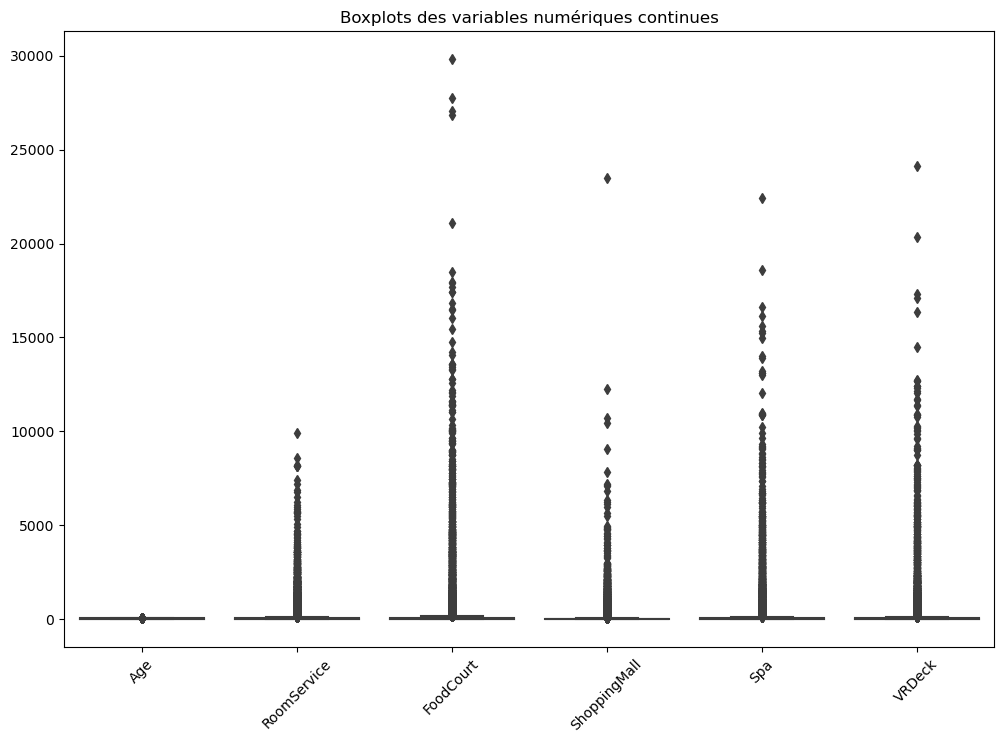

In [ ]:
# Sélectionnez les colonnes numériques continues pour la visualisation
variables_continues = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(12, 8))
sns.boxplot(data=train[variables_continues])
plt.xticks(rotation=45)
plt.title('Boxplots des variables numériques continues')
plt.show()

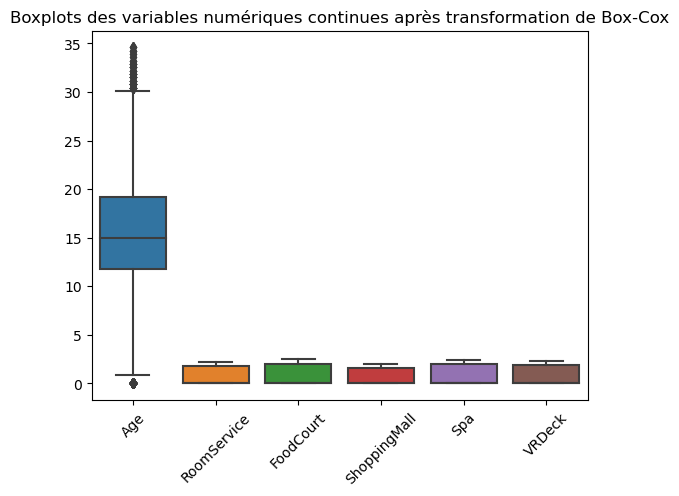

In [ ]:
from scipy.stats import boxcox
for column in variables_continues:
    # La transformation de Box-Cox nécessite que toutes les valeurs soient positives
    # On ajoute 1 pour éviter les problèmes avec les zéros ou les valeurs négatives
    train[column], fitted_lambda = boxcox(train[column] + 1)

# Afficher le résultat de la transformation de Box-Cox
sns.boxplot(data=train[variables_continues])
plt.xticks(rotation=45)
plt.title('Boxplots des variables numériques continues après transformation de Box-Cox')
plt.show()


In [ ]:
# Supposons que 'train' est votre DataFrame original

# Faire du bootstrapping pour doubler la taille du dataset
bootstrap_train = train.sample(n=len(train), replace=True, random_state=1)

# Concaténer le DataFrame original et le DataFrame bootstrap pour doubler la taille
train = pd.concat([train, bootstrap_train], ignore_index=True)

# Vérifier la nouvelle taille du DataFrame
print(f"Taille originale du DataFrame : {train.shape}")
print(f"Taille doublée du DataFrame : {train_doubled.shape}")


Taille originale du DataFrame : (16568, 28)
Taille doublée du DataFrame : (16568, 28)


In [ ]:
train.shape

(16568, 28)

### Extraction des caractéristiques (features) et de la cible (target)

In [ ]:
# Sélection des features et de la target pour l'ensemble d'entraînement
X = train.drop(['Transported', 'PassengerId'], axis=1)  # Exclut 'Transported' et 'PassengerId' de l'ensemble de features
y = train['Transported']  # Utilise 'Transported' comme la variable cible (y)

PassengerId est exclu car il s'agit d'un identifiant unique pour chaque passager qui n'apporte probablement pas d'information utile pour la prédiction.

### Division de l'ensemble d'entraînement

In [ ]:
from sklearn.model_selection import train_test_split

# Division de l'ensemble d'entraînement en sous-ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=30)

### Préparation de l'ensemble de test


In [ ]:
# Prépare l'ensemble de test en excluant 'PassengerId'
X_test = test.drop(['PassengerId'], axis=1)

## Differents Models

différentes métriques pour l'evaluation des models.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# pour eviter les warnings
import warnings
warnings.filterwarnings('ignore')

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Mise en œuvre de la Régression Logistique

In [ ]:
#Logistic Regression lr
lr = LogisticRegression(random_state=42)

# entrainer
lr.fit(X_train, y_train)

# prediction sur les donnees de la validation
y_pred = lr.predict(X_val)



#### Évaluation du Modèle

In [ ]:
# Calcul de la précision
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Affichage du rapport de classification et de la matrice de confusion
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Accuracy: 0.7534701267350634
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1582
           1       0.78      0.73      0.76      1732

    accuracy                           0.75      3314
   macro avg       0.75      0.75      0.75      3314
weighted avg       0.76      0.75      0.75      3314

Confusion Matrix:
[[1226  356]
 [ 461 1271]]


Cette analyse montre que le modèle de régression logistique a une performance relativement bonne et équilibrée sur l'ensemble de validation, avec une capacité similaire à identifier les deux classes.

### RandomForestClassifier

In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Initialisation du modèle RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)  # Ajout de random_state pour la reproductibilité

# Entraînement du modèle sur l'ensemble d'entraînement
rfc.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation
y_pred = rfc.predict(X_val)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9432709716354858


### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Initialisation du classificateur Arbre de Décision avec le paramètre random_state fixé pour la reproductibilité
dtc = DecisionTreeClassifier(random_state=42, max_depth=None)  # 'max_depth=None' permet à l'arbre de se développer jusqu'à ce que toutes les feuilles soient pures ou que toutes les feuilles contiennent moins d'échantillons que min_samples_split

# Entraînement du classificateur sur l'ensemble d'entraînement
dtc.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation
y_pred = dtc.predict(X_val)


In [ ]:
# Calcul de la précision
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Affichage du rapport de classification pour une évaluation détaillée
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Affichage de la matrice de confusion pour visualiser les performances du modèle
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Accuracy: 0.9330114665057333
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1582
           1       0.93      0.94      0.94      1732

    accuracy                           0.93      3314
   macro avg       0.93      0.93      0.93      3314
weighted avg       0.93      0.93      0.93      3314

Confusion Matrix:
[[1468  114]
 [ 108 1624]]


In [ ]:
probabilites = rfc.predict_proba(X_test)[:, 1]

# Convertir les probabilités en étiquettes de classe basées sur le seuil 0.5
y_result = np.where(probabilites >= 0.5, 1, 0)


In [ ]:
y_result.shape

(4277,)

In [ ]:
y_result=y_result.astype(bool)

In [ ]:
result = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_result})


In [ ]:
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
result.to_csv('./submission.csv',index=False)

In [ ]:
print(result.head())

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01        False
4     0023_01        False


In [ ]:
result.shape

(4277, 2)